##### Optimization

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev, diff_method = "parameter-shift")
def scalar_valued_circuit(params):

    qml.RX(params[0], wires = 0)
    qml.CNOT(wires=[0,1])
    qml.RY(params[1], wires = 0)
    
    return qml.expval(qml.PauliZ(0))

params = np.array([0.1, 0.2], requires_grad = True)
print(scalar_valued_circuit(params))

0.9751703272018161


In [ ]:
def optimize(cost_function, init_params, *steps):

    opt = qml.GradientDescentOptimizer(stepsize = 0.2)
    steps = 100
    params = init_params

    for i in range(steps):
        params = opt.step(cost_function, params)

    return params, cost_function(params)


In [5]:
params, output = optimize(scalar_valued_circuit, params)
print(f"The parameter that give the minimum output: {params}")
print(f"The minimum output: {output}")

The parameter that give the minimum output: [5.98899657e-09 3.14159264e+00]
The minimum output: -1.0


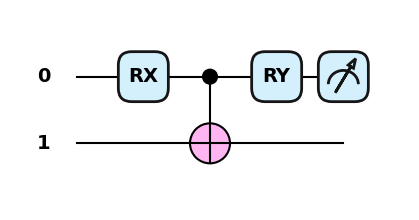

In [16]:
fig, ax = qml.draw_mpl(scalar_valued_circuit, style = "pennylane")(params)
fig.set_size_inches(4,2)
plt.show()